
1 Failed download:
- BRK.B: No timezone found, symbol may be delisted
Error downloading BRK.B: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

1 Failed download:
- BF.B: 1d data not available for startTime=-2208994789 and endTime=1695067619. Only 100 years worth of day granularity data are allowed to be fetched per request.
Error downloading BF.B: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'


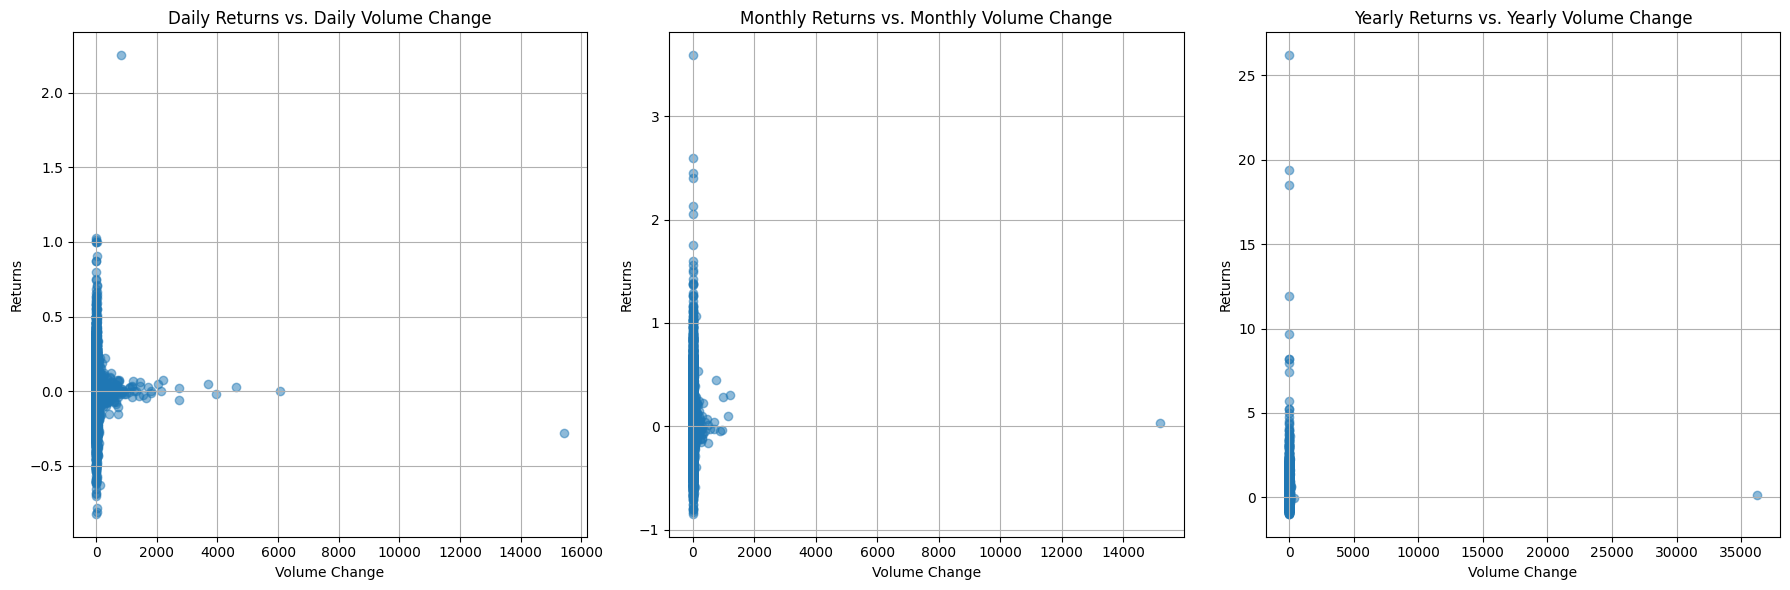

Overall Daily Returns vs. Daily Volume Change Correlation: -0.0011
Overall Monthly Returns vs. Monthly Volume Change Correlation: 0.0016
Overall Yearly Returns vs. Yearly Volume Change Correlation: 0.0006


In [23]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

def replace_invalid_with_avg(values):
    avg_value = sum(val for val in values if pd.notnull(val) and val != float('inf') and val != -float('inf')) / len([val for val in values if pd.notnull(val) and val != float('inf') and val != -float('inf')])
    values = [0 if pd.isnull(val) else val for val in values]
    values = [avg_value if val == float('inf') or val == -float('inf') else val for val in values]
    
    return values

# Загрузка списка акций S&P 500 из GitHub
sp500_tickers_df = pd.read_csv('https://raw.githubusercontent.com/datasets/s-and-p-500-companies/main/data/constituents.csv')
sp500_tickers = sp500_tickers_df['Symbol'].tolist()

all_daily_returns = []
all_daily_volume_changes = []

all_monthly_returns = []
all_monthly_volume_changes = []

all_yearly_returns = []
all_yearly_volume_changes = []

for ticker in sp500_tickers:
    try:
        # Загрузка данных акции за всю историю
        data = yf.download(ticker, progress=False)

        # Рассчет ежедневных доходов и изменений объема
        data['Daily Returns'] = data['Close'].pct_change()
        data['Daily Volume Change'] = data['Volume'].pct_change()

        all_daily_returns.extend(data['Daily Returns'].tolist())
        all_daily_volume_changes.extend(data['Daily Volume Change'].tolist())

        # Группировка данных по месяцам и годам
        monthly_data = data.resample('M').last()
        monthly_data['Monthly Returns'] = monthly_data['Close'].pct_change()
        monthly_data['Monthly Volume Change'] = monthly_data['Volume'].pct_change()

        all_monthly_returns.extend(monthly_data['Monthly Returns'].tolist())
        all_monthly_volume_changes.extend(monthly_data['Monthly Volume Change'].tolist())

        yearly_data = data.resample('Y').last()
        yearly_data['Yearly Returns'] = yearly_data['Close'].pct_change()
        yearly_data['Yearly Volume Change'] = yearly_data['Volume'].pct_change()

        all_yearly_returns.extend(yearly_data['Yearly Returns'].tolist())
        all_yearly_volume_changes.extend(yearly_data['Yearly Volume Change'].tolist())

    except Exception as e:
        print(f"Error downloading {ticker}: {str(e)}")

# Визуализация scatter plot
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].scatter(all_daily_volume_changes, all_daily_returns, alpha=0.5)
axes[0].set_title('Daily Returns vs. Daily Volume Change')
axes[0].set_xlabel('Volume Change')
axes[0].set_ylabel('Returns')
axes[0].grid(True)

axes[1].scatter(all_monthly_volume_changes, all_monthly_returns, alpha=0.5)
axes[1].set_title('Monthly Returns vs. Monthly Volume Change')
axes[1].set_xlabel('Volume Change')
axes[1].set_ylabel('Returns')
axes[1].grid(True)

axes[2].scatter(all_yearly_volume_changes, all_yearly_returns, alpha=0.5)
axes[2].set_title('Yearly Returns vs. Yearly Volume Change')
axes[2].set_xlabel('Volume Change')
axes[2].set_ylabel('Returns')
axes[2].grid(True)

plt.tight_layout()
plt.show()

all_daily_returns = replace_invalid_with_avg(all_daily_returns)
all_daily_volume_changes = replace_invalid_with_avg(all_daily_volume_changes)
all_monthly_returns = replace_invalid_with_avg(all_monthly_returns)
all_monthly_volume_changes = replace_invalid_with_avg(all_monthly_volume_changes)
all_yearly_returns = replace_invalid_with_avg(all_yearly_returns)
all_yearly_volume_changes = replace_invalid_with_avg(all_yearly_volume_changes)

daily_corr = pd.Series(all_daily_returns).corr(pd.Series(all_daily_volume_changes))
monthly_corr = pd.Series(all_monthly_returns).corr(pd.Series(all_monthly_volume_changes))
yearly_corr = pd.Series(all_yearly_returns).corr(pd.Series(all_yearly_volume_changes))

print(f"Overall Daily Returns vs. Daily Volume Change Correlation: {daily_corr:.4f}")
print(f"Overall Monthly Returns vs. Monthly Volume Change Correlation: {monthly_corr:.4f}")
print(f"Overall Yearly Returns vs. Yearly Volume Change Correlation: {yearly_corr:.4f}")
